In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

#### Question 1 (20%)
Load the energy data from the file Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

e.g.

'Bolivia (Plurinational State of)' should be 'Bolivia',

'Switzerland17' should be 'Switzerland'.



Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"



Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.

In [8]:
def answer_one():
    e_indc = pd.read_excel('Energy Indicators.xls',skiprows=17,skip_footer=38)
    e_indc = e_indc.iloc[:,2:]
    e_indc.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

    ## cleaning Country column from text in brackets:'()' and from any digits using regex:
    Country_df = e_indc['Country'].str.extract('(.*)\s\(.*\)|(\D*)',expand=False)
    e_indc['Country'] = Country_df[1].fillna(Country_df[0])

    ## replace method to change names of certain countries
    e_indc.replace({"Country":{"Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"}},inplace=True)

    ## loading GDP dataset:
    GDP = pd.read_csv('world_bank.csv',sep=',' ,skiprows=3)
    GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"}, inplace = True)
    GDP = GDP.iloc[:,:-1]
    GDP = GDP.rename(columns={'Country Name': 'Country'})

    ## choosing cols from 2006 to 2015 and Country Name
    cols = [str(x) for x in range(2006,2016)]
    cols=['Country'] + cols
    GDP = GDP.loc[:,cols]

    ## Loading Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology
    ScimEn = pd.read_excel('scimagojr.xlsx')
    ## Selecting top 15 countries (dataset is already sorted)
    ScimEn = ScimEn.iloc[:15,:]

    renew_df = pd.merge(ScimEn, e_indc, on='Country',how = 'left')
    renew_df = pd.merge(renew_df, GDP, left_on='Country', right_on = 'Country',how = 'left')
    renew_df = renew_df.set_index('Country')
    return renew_df

In [12]:
renew_df = answer_one()
renew_df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,147887,147512,856806,583858,5.79,162,127191,93,19.75491,2.752132e+12,3.552182e+12,4.598206e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13
United States,2,113579,111426,1085684,370574,9.56,259,90838,286,11.57098,1.385589e+13,1.447764e+13,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.812071e+13
Japan,3,34294,34054,275980,73491,8.05,145,18984,149,10.23282,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12
United Kingdom,4,24328,23671,278694,52119,11.46,159,7920,124,10.60047,2.692613e+12,3.074360e+12,2.890564e+12,2.382826e+12,2.441173e+12,2.619700e+12,2.662085e+12,2.739819e+12,3.022828e+12,2.885570e+12
India,5,21450,21183,179494,54929,8.37,132,33195,26,14.96908,9.203165e+11,1.201112e+12,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.035393e+12,2.089865e+12


#### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)


In [26]:
pd.options.display.float_format = '{:,.0f}'.format
avgGDP = renew_df.loc[:,'2006':].apply(np.mean,axis=1).sort_values(ascending = False)
avgGDP

Country
United States        15,631,373,100,000
China                 6,940,045,830,019
Japan                 5,176,323,047,989
Germany               3,535,027,868,981
United Kingdom        2,741,153,850,292
France                2,688,772,943,597
Italy                 2,131,032,197,106
Brazil                1,989,028,349,915
Russian Federation    1,668,661,354,760
Canada                1,611,539,657,161
India                 1,592,160,720,392
Spain                 1,407,026,614,437
Australia             1,202,762,833,520
South Korea           1,165,810,385,851
Iran                    439,349,783,035
dtype: float64

#### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

In [48]:
### 1st approach
np.diff(renew_df.loc[avgGDP.index[5],['2006','2015']])
### 2nd approach
GDP_change = renew_df['2015'] - renew_df['2006']
GDP_change[avgGDP.index[5]]

108550097312.71973

#### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?


In [50]:
renew_df['Energy Supply per Capita'].mean()

157.59999999999999

#### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?


In [53]:
renew_df['% Renewable'].argmax(), renew_df['% Renewable'].max()

('Brazil', 69.648030000000006)

#### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

In [61]:
renew_df['%Self to Total Citations'] = renew_df['Self-citations']/renew_df['Citations']*100
renew_df['%Self to Total Citations'].argmax(), renew_df['%Self to Total Citations'].max()

('China', 68.143547080669364)

#### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [62]:
renew_df['Population_est'] = renew_df['Energy Supply'] / renew_df['Energy Supply per Capita'] 
renew_df['Population_est'].sort_values(axis=0,ascending=False).index[2]

'United States'

#### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

In [83]:
mask = renew_df.dtypes == 'object'

In [93]:
renew_df[mask.index[mask]] = renew_df[mask.index[mask]].astype(float)

In [94]:
renew_df['No of cit doc per person'] = renew_df['Citable documents']/ renew_df['Energy Supply per Capita']
renew_df['No of cit doc per person'].corr(renew_df['Energy Supply per Capita'])

-0.38898861082880276

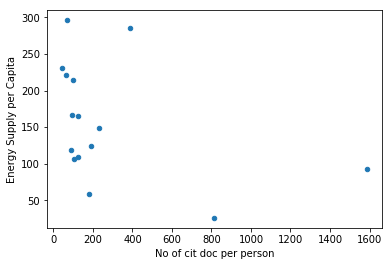

In [102]:
renew_df.plot.scatter(x='No of cit doc per person',y = 'Energy Supply per Capita')
plt.show()

#### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

In [112]:
renew_df['%Renewable above median'] = renew_df['% Renewable'].map(lambda x: x> np.median(renew_df['% Renewable']))
renew_df['%Renewable above median'].astype(int)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
India                 0
Russian Federation    1
Germany               1
Canada                1
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: %Renewable above median, dtype: int32

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [113]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [114]:
renew_df['Continent'] = [ContinentDict[x] for x in renew_df.index]

In [131]:
#1st approach
continents_grouped = renew_df.groupby(['Continent'])

Continents = pd.DataFrame({'size':continents_grouped.size()})
Continents['sum'] = continents_grouped['Population_est'].apply(sum)
Continents['mean'] = continents_grouped['Population_est'].apply(np.mean)
Continents['std'] = continents_grouped['Population_est'].apply(np.std) 


#2nd approach
renew_df.pivot_table(values = 'Population_est',index='Continent',aggfunc = [np.size,np.mean, np.sum,np.std])    



#3rd approach:
def basic_stats(df): 
    
    output={'size': np.size(df['Population_est']),
           'mean': np.mean(df['Population_est']),
           'sum': np.sum(df['Population_est']),
           'std': np.std(df['Population_est'])}
    
    return pd.Series(output,index =['size','mean','sum','std'] )

Continent_stats = renew_df.groupby('Continent').apply(basic_stats)  
Continent_stats

,size,mean,sum,std
Continent,,,,
Asia,5,580,"2,899",607
Australia,1,23,23,0
Europe,6,76,458,32
North America,2,176,353,141
South America,1,206,206,0


#### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?


In [137]:
renew_df['% Renewable cat'] = pd.cut(renew_df['% Renewable'],bins = 5,precision = 0)

In [139]:
renew_df.groupby(['Continent','% Renewable cat']).size()

Continent      % Renewable cat
Asia           (2.0, 16.0]        4
               (16.0, 29.0]       1
Australia      (2.0, 16.0]        1
Europe         (2.0, 16.0]        1
               (16.0, 29.0]       3
               (29.0, 43.0]       2
North America  (2.0, 16.0]        1
               (56.0, 70.0]       1
South America  (56.0, 70.0]       1
dtype: int64

#### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464


In [158]:
renew_df['Population_est'].apply(lambda x: "{:,.2f}".format(x))

Country
China                 1,367.65
United States           317.62
Japan                   127.41
United Kingdom           63.87
India                 1,276.73
Russian Federation      143.50
Germany                  80.37
Canada                   35.24
France                   63.84
South Korea              49.81
Italy                    59.91
Spain                    46.44
Iran                     77.08
Australia                23.32
Brazil                  205.92
Name: Population_est, dtype: object